# Python Flood prediction

### 1- Libraries required

### 2- Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

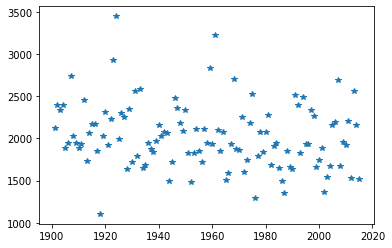

In [2]:
x=pd.read_csv("D:/Jupyter/Simplon/Innondation/kerela.csv")
y=pd.read_csv("D:/Jupyter/Simplon/Innondation/kerela.csv")

y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1,x1,'*')
plt.show()

### 3- Creation de la variable cible indiquant s'il y a inondation ou non

In [3]:
flood=[]
june=[]
sub=[]
#CREATING A NEW COLUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT 
#YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD

for i in range(0,len(x1)):
    if x1[i]>2400:
        flood.append("1")
    else:
        flood.append("0")
#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF 
#JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY 
#TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))

df=pd.DataFrame({"flood":flood})
df1=pd.DataFrame({"per_10_days":june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub
#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("new.csv")

### 4- Model Training 

#### a-Logistic regression

In [4]:
import scipy
from scipy.stats import spearmanr
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=x.iloc[:,[16,20,21]].values
y1=x.iloc[:,19].values

(X_train,X_test,Y_tain,Y_test)=train_test_split(x1,y1,random_state=0)

lr=LogisticRegression()
lr.fit(X,y1)
print(lr.score(X,y1))

0.8608695652173913


#### b- Prediction  

In [5]:
March_May_avg=280
avg_past_10days_rain=140
avg_increase_rain_may_june=250

March_May_avg2=1000
avg_past_10days_rain2=1000
avg_increase_rain_may_june2=1000

f1=[[March_May_avg,avg_past_10days_rain,avg_increase_rain_may_june]]
f2=[[March_May_avg2,avg_past_10days_rain2,avg_increase_rain_may_june2]]
predict1= np.argmax(lr.predict(f1))
predict2=np.argmax(lr.predict(f2))
#print(predict1)
#print(predict2)
if(predict1==0):
    print(predict1, "-chances of flood")
if(predict2==0):
    print(predict2, "-chances of flood")
if(predict1==1):
    print(predict1,"-no chances of flood")
if(predict2==1):
    print(predict2, "-no chances of flood")

0 -chances of flood
0 -chances of flood


#### c-xgboost

In [6]:
# xgboost n°1
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [7]:
xgb_clf = XGBClassifier().fit(X,y1)
print(xgb_clf.score(X,y1))

0.991304347826087


In [8]:
March_May_avg=280
avg_past_10days_rain=140
avg_increase_rain_may_june=250

March_May_avg2=1000
avg_past_10days_rain2=1000
avg_increase_rain_may_june2=1000

f1=[[March_May_avg,avg_past_10days_rain,avg_increase_rain_may_june]]
f2=[[March_May_avg2,avg_past_10days_rain2,avg_increase_rain_may_june2]]
predict1= np.argmax(xgb_clf.predict(f1))
predict2=np.argmax(xgb_clf.predict(f2))
#print(predict1)
#print(predict2)
if(predict1==0):
    print(predict1, "-chances of flood")
if(predict2==0):
    print(predict2, "-chances of flood")
if(predict1==1):
    print(predict1,"-no chances of flood")
if(predict2==1):
    print(predict2, "-no chances of flood")

0 -chances of flood
0 -chances of flood
